In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import sem

In [3]:
childhood_violent_crime_to_load = "../../Children-in-households-with-violent-crime_2014_0731_1400.csv"
college_enrollment_to_load = "../../userssharedsdfperc18to24yoenrld24ycsre20002012.csv"

childhood_violent_crime = pd.read_csv(childhood_violent_crime_to_load)
college_enrollment = pd.read_csv(college_enrollment_to_load)

In [4]:
# Remove grand total, total for males, and total for females from this analysis
childhood_violent_crime_cleaned = childhood_violent_crime.dropna(subset = ["Sex", "Race/ethnicity"])
college_enrollment_cleaned = college_enrollment.dropna(subset = ["Sex", "Race/ethnicity"])

childhood_violent_crime_reduced = childhood_violent_crime_cleaned[["Race/ethnicity", "Sex", "Year",
                                                                  "Type of violent crime", "Percentage",
                                                                  "Standard Error on Percentage", "Count", 
                                                                  "Standard Error on Count"]]
college_enrollment_reduced = college_enrollment_cleaned[["Race/ethnicity", "Sex", "Year", "Percentage", 
                                                         "Standard Error on Percentage", "Count (in thousands)", 
                                                         "Standard Error on Count (in thousands)"]]

childhood_violent_crime_reduced.head()
#college_enrollment_reduced.head()

,Race/ethnicity,Sex,Year,Type of violent crime,Percentage,Standard Error on Percentage,Count,Standard Error on Count
117,"White, non-Hispanic",Male,2000,Violent crime,6.7,0.6,1868830.0,182685.1
118,"White, non-Hispanic",Male,2001,Violent crime,5.2,0.5,1410800.0,136673.6
119,"White, non-Hispanic",Male,2002,Violent crime,4.3,0.5,1121580.0,137437.1
120,"White, non-Hispanic",Male,2003,Violent crime,4.6,0.5,1198070.0,134083.0
121,"White, non-Hispanic",Male,2004,Violent crime,5.0,0.5,1241850.0,122063.9


In [5]:
child_crime_college_enrol = pd.merge(college_enrollment_reduced, childhood_violent_crime_reduced, 
                                     on = ["Race/ethnicity", "Sex", "Year"])

child_crime_college_enrol = child_crime_college_enrol.rename(columns = {"Percentage_x":"% College Enroll", 
                                                                        "Standard Error on Percentage_x":"S.E. for % College Enroll", 
                                                                       "Count (in thousands)":"College Enroll Count (in thousands)",
                                                                       "Standard Error on Count (in thousands)":"S.E. for College Enroll Count",
                                                                       "Percentage_y":"% Youth Crime Exposure",
                                                                       "Standard Error on Percentage_y":"S.E. for % Youth Crime Exposure",
                                                                       "Count":"Youth Crime Exposure Count",
                                                                       "Standard Error on Count":"S.E. on Youth Crime Exposure Count"})

In [6]:
child_crime_college_enrol

,Race/ethnicity,Sex,Year,% College Enroll,S.E. for % College Enroll,College Enroll Count (in thousands),S.E. for College Enroll Count,Type of violent crime,% Youth Crime Exposure,S.E. for % Youth Crime Exposure,Youth Crime Exposure Count,S.E. on Youth Crime Exposure Count
0,"White, non-Hispanic",Male,2000,36.2%,0.79,3136.0,85.0,Violent crime,6.7,0.6,1868830.0,182685.1
1,"White, non-Hispanic",Male,2000,36.2%,0.79,3136.0,85.0,Serious violent crime,2.0,0.3,553060.0,78395.0
2,"White, non-Hispanic",Male,2000,36.2%,0.79,3136.0,85.0,Simple assault,5.0,0.5,1405860.0,149831.7
3,"White, non-Hispanic",Male,2001,37.2%,0.79,3291.0,87.0,Violent crime,5.2,0.5,1410800.0,136673.6
4,"White, non-Hispanic",Male,2001,37.2%,0.79,3291.0,87.0,Serious violent crime,1.6,0.2,432390.0,61717.5
...,...,...,...,...,...,...,...,...,...,...,...,...
307,"Two or more races, non-Hispanic",Female,2011,46%,5.07,123.0,16.0,Serious violent crime,5.6,2.3,20880.0,9317.5
308,"Two or more races, non-Hispanic",Female,2011,46%,5.07,123.0,16.0,Simple assault,7.0,2.6,26070.0,10677.3
309,"Two or more races, non-Hispanic",Female,2012,43.6%,5.13,152.0,23.0,Violent crime,9.8,3.4,38530.0,14618.0
310,"Two or more races, non-Hispanic",Female,2012,43.6%,5.13,152.0,23.0,Serious violent crime,NaN,NaN,NaN,NaN


Exposure to Violent Crime by Sex

In [7]:
# Create DataFrames with percentage exposed and standard error
cleaned_pct = child_crime_college_enrol[['Year', 'Sex', '% Youth Crime Exposure']]
cleaned_ser = child_crime_college_enrol[['Year', 'Sex', 'S.E. for % Youth Crime Exposure']]

In [8]:
# Group percent exposed to violent crime by year and sex

crime_grouped = cleaned_pct.groupby(["Year", "Sex"])

# Get mean for each year/sex
crime_by_sex = crime_grouped.mean()

#Convert to pivot for easier plotting
df = pd.pivot_table(crime_by_sex, index=['Year'], columns = "Sex")
pct_df = df["% Youth Crime Exposure"]

#Reset index
pct_df = pct_df.reset_index()

#Preview DataFrame
pct_df


Sex,Year,Female,Male
0,2000,5.855556,3.877778
1,2001,4.988889,3.744444
2,2002,4.555556,2.988889
3,2003,8.208333,7.816667
4,2004,6.345455,2.627273
5,2005,8.350000,5.491667
6,2006,7.033333,6.575000
7,2007,5.333333,3.775000
8,2008,5.100000,3.600000
9,2009,6.158333,3.636364


In [9]:
# Do the same for standard error
ser_grouped = cleaned_ser.groupby(["Year", "Sex"])

ser_by_sex = ser_grouped.mean()


df2 = pd.pivot_table(ser_by_sex, index=['Year'], columns = "Sex")
ser_df = df2["S.E. for % Youth Crime Exposure"]
ser_df = ser_df.reset_index()
ser_df

Sex,Year,Female,Male
0,2000,0.766667,0.600000
1,2001,0.644444,0.588889
2,2002,0.655556,0.555556
3,2003,1.666667,1.908333
4,2004,1.345455,0.636364
5,2005,1.800000,1.541667
6,2006,1.408333,1.466667
7,2007,1.000000,0.883333
8,2008,1.266667,1.263636
9,2009,1.566667,1.236364


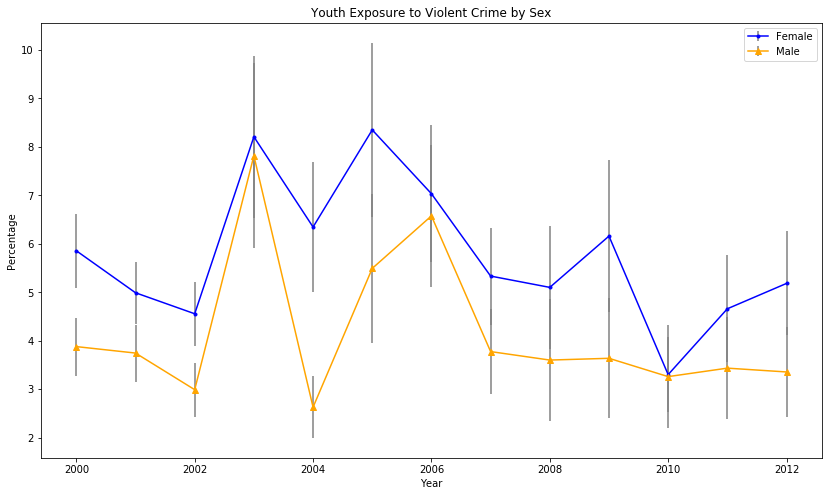

In [11]:
# Build a scatter plot for each data type
fig, ax = plt.subplots(figsize=(14, 8))
ax.errorbar(pct_df["Year"], pct_df["Female"], ser_df["Female"], marker=".", color = "b", ecolor='gray')
ax.errorbar(pct_df["Year"], pct_df["Male"], ser_df["Male"], marker="^", color = "orange", ecolor='gray')


# Incorporate the other graph properties
plt.title("Youth Exposure to Violent Crime by Sex")
plt.ylabel("Percentage")
plt.xlabel("Year")
plt.legend(['Female', 'Male'])

# Save the figure
plt.savefig("YouthExptoViolentCrime.png")

# Show plot
plt.show()

Exposure to Violent Crime by Race

In [12]:
# Create DataFrames with percentage exposed and standard error
pct_by_race = child_crime_college_enrol[['Year', 'Race/ethnicity', '% Youth Crime Exposure']]
ser_by_race = child_crime_college_enrol[['Year', 'Race/ethnicity', 'S.E. for % Youth Crime Exposure']]

pct_by_race.head()

,Year,Race/ethnicity,% Youth Crime Exposure
0,2000,"White, non-Hispanic",6.7
1,2000,"White, non-Hispanic",2.0
2,2000,"White, non-Hispanic",5.0
3,2001,"White, non-Hispanic",5.2
4,2001,"White, non-Hispanic",1.6


In [13]:
# Group percent exposed to violent crime by year and race

race_grouped = pct_by_race.groupby(["Year", "Race/ethnicity"])

# Get mean for each year/sex
crime_by_race = race_grouped.mean()

#Convert to pivot for easier plotting
df3 = pd.pivot_table(crime_by_race, index=['Year'], columns = "Race/ethnicity")
pct_df1 = df3["% Youth Crime Exposure"]
cleaned_crime_by_race = pct_df1[[ "Black, non-Hispanic", "Hispanic","White, non-Hispanic" ]]

#Reset index
cleaned_crime_by_race = pct_df1.reset_index()
cleaned_crime_by_race = cleaned_crime_by_race[["Year", "Black, non-Hispanic", "Hispanic","White, non-Hispanic" ]]

#Preview DataFrame
cleaned_crime_by_race.head()

Race/ethnicity,Year,"Black, non-Hispanic",Hispanic,"White, non-Hispanic"
0,2000,4.816667,4.800000,4.983333
1,2001,4.166667,4.566667,4.366667
2,2002,3.816667,3.400000,4.100000
3,2003,3.700000,3.800000,4.033333
4,2004,3.666667,2.583333,3.766667


In [14]:
# Do the same for standard error
race_ser_grouped = ser_by_race.groupby(["Year", "Race/ethnicity"])

# Get mean for each year/sex
crime_by_race_ser = race_ser_grouped.mean()

#Convert to pivot for easier plotting
df4 = pd.pivot_table(crime_by_race_ser, index=['Year'], columns = "Race/ethnicity")
pct_df2 = df4["S.E. for % Youth Crime Exposure"]
cleaned_crime_by_race_ser = pct_df2[[ "Black, non-Hispanic", "Hispanic","White, non-Hispanic" ]]

#Reset index
cleaned_crime_by_race_ser = pct_df2.reset_index()
cleaned_crime_by_race_ser = cleaned_crime_by_race_ser[["Year", "Black, non-Hispanic", "Hispanic","White, non-Hispanic" ]]

#Preview DataFrame
cleaned_crime_by_race_ser.head()

Race/ethnicity,Year,"Black, non-Hispanic",Hispanic,"White, non-Hispanic"
0,2000,0.766667,0.766667,0.516667
1,2001,0.683333,0.716667,0.450000
2,2002,0.700000,0.650000,0.466667
3,2003,0.700000,0.650000,0.450000
4,2004,0.683333,0.450000,0.400000


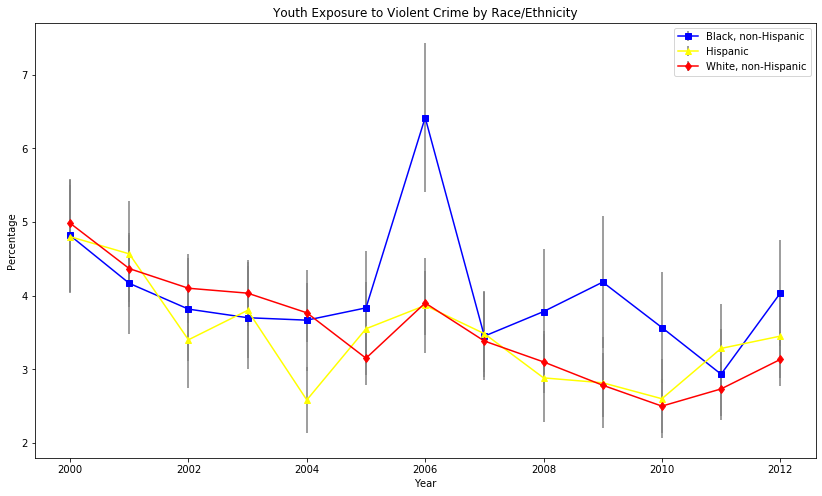

In [15]:
# Build a scatter plot for each data type
fig, ax = plt.subplots(figsize=(14, 8))
ax.errorbar(cleaned_crime_by_race["Year"], cleaned_crime_by_race["Black, non-Hispanic"], 
    cleaned_crime_by_race_ser["Black, non-Hispanic"], marker="s", color = "blue", ecolor='gray')
ax.errorbar(cleaned_crime_by_race["Year"], cleaned_crime_by_race["Hispanic"], 
    cleaned_crime_by_race_ser["Hispanic"], marker="^", color = "yellow", ecolor='gray')
ax.errorbar(cleaned_crime_by_race["Year"], cleaned_crime_by_race["White, non-Hispanic"], 
    cleaned_crime_by_race_ser["White, non-Hispanic"], marker="d", color = "red", ecolor='gray')



# Incorporate the other graph properties
plt.title("Youth Exposure to Violent Crime by Race/Ethnicity")
plt.ylabel("Percentage")
plt.xlabel("Year")
plt.legend(['Black, non-Hispanic', 'Hispanic', 'White, non-Hispanic'])

# Save the figure
plt.savefig("YouthExptoViolentCrimebyRace.png")

# Show plot
plt.show()